In [8]:
import numpy as np
from mfpml.optimization.sfbo import BayesOpt
from mfpml.problems.singlefidelity_functions import Forrester
from mfpml.optimization.sf_acqusitions import EI, LCB, PI
from mfpml.models.kriging import Kriging
from mfpml.design_of_experiment.singlefideliy_samplers import LatinHyperCube

In [9]:
func = Forrester
print(func.optimum)
sampler = LatinHyperCube(design_space=func.design_space, seed=7)
# get samples
sample_x = sampler.get_samples(num_samples=3)
sample_y = func.f(sample_x)

-6.02074


In [10]:
# print(best_y, best_x)
model = Kriging(design_space=func.input_domain)
acf1 = PI()

In [11]:
opti = BayesOpt(problem=func)
opti.run_optimizer(
    surrogate=model,
    acquisition=acf1,
    max_iter=10,
    init_x=sample_x,
    init_y=sample_y,
)

iter:0 =====================================
best_y: -5.893617
best_x: [0.7414381]
iter:1 =====================================
best_y: -5.894360
best_x: [[0.74148563]]
iter:2 =====================================
best_y: -5.911594
best_x: [[0.74262748]]
iter:3 =====================================
best_y: -5.911594
best_x: [[0.74262748]]
iter:4 =====================================
best_y: -5.920470
best_x: [[0.74324885]]
iter:5 =====================================
best_y: -5.950114
best_x: [[0.7455428]]
iter:6 =====================================
best_y: -5.980780
best_x: [[0.74848445]]
iter:7 =====================================
best_y: -6.020682
best_x: [[0.75691791]]
iter:8 =====================================
best_y: -6.020682
best_x: [[0.75691791]]
iter:9 =====================================
best_y: -6.020682
best_x: [[0.75691791]]
iter:10 =====================================
best_y: -6.020739
best_x: [[0.75719573]]


(-6.0207385546392524, array([[0.75719573]]))

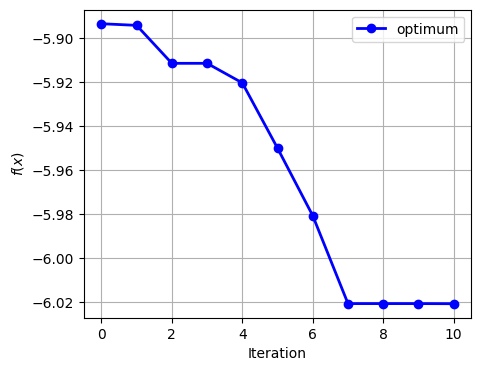

In [12]:
opti.plot_optimization_history(figsize=(5, 4))

In [13]:
print(opti.log)

OrderedDict([(0, (array([[0.12496818],
       [0.3675954 ],
       [0.7414381 ]]), array([[-0.93492019],
       [ 0.01688959],
       [-5.89361684]]))), (1, (array([[0.74148563]]), array([[-5.89436003]]))), (2, (array([[0.74262748]]), array([[-5.91159429]]))), (3, (array([[0.82133814]]), array([[-3.5515817]]))), (4, (array([[0.74324885]]), array([[-5.92046956]]))), (5, (array([[0.7455428]]), array([[-5.95011392]]))), (6, (array([[0.74848445]]), array([[-5.98078011]]))), (7, (array([[0.75691791]]), array([[-6.02068166]]))), (8, (array([[8.49742295e-06]]), array([[3.02678903]]))), (9, (array([[0.23165957]]), array([[-0.34949858]]))), (10, (array([[0.75719573]]), array([[-6.02073855]])))])


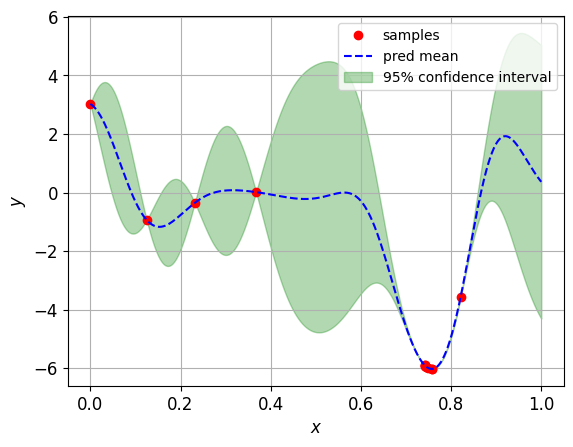

In [14]:
opti.surrogate.plot_prediction()